In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [ ]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# K-Mean Clustering

In [ ]:
X = customer_data[['Annual Income (k$)',	'Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import KMeans


wcss = []

for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

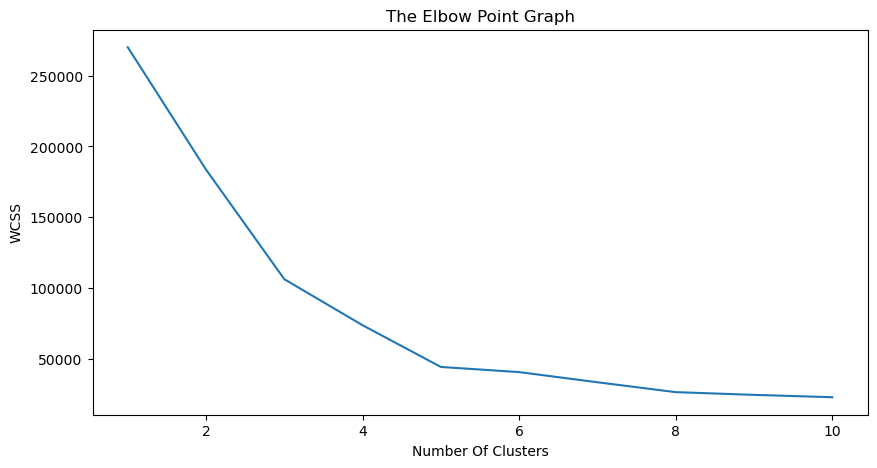

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In the graph, as u notice there is a cutoff point like drop in the values in number 3 and 5, so there are two elbow points

Optimum Number of Clusters = 5



In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, init='k-means++', random_state=42)


Y = km.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Visualizing all the Clusters

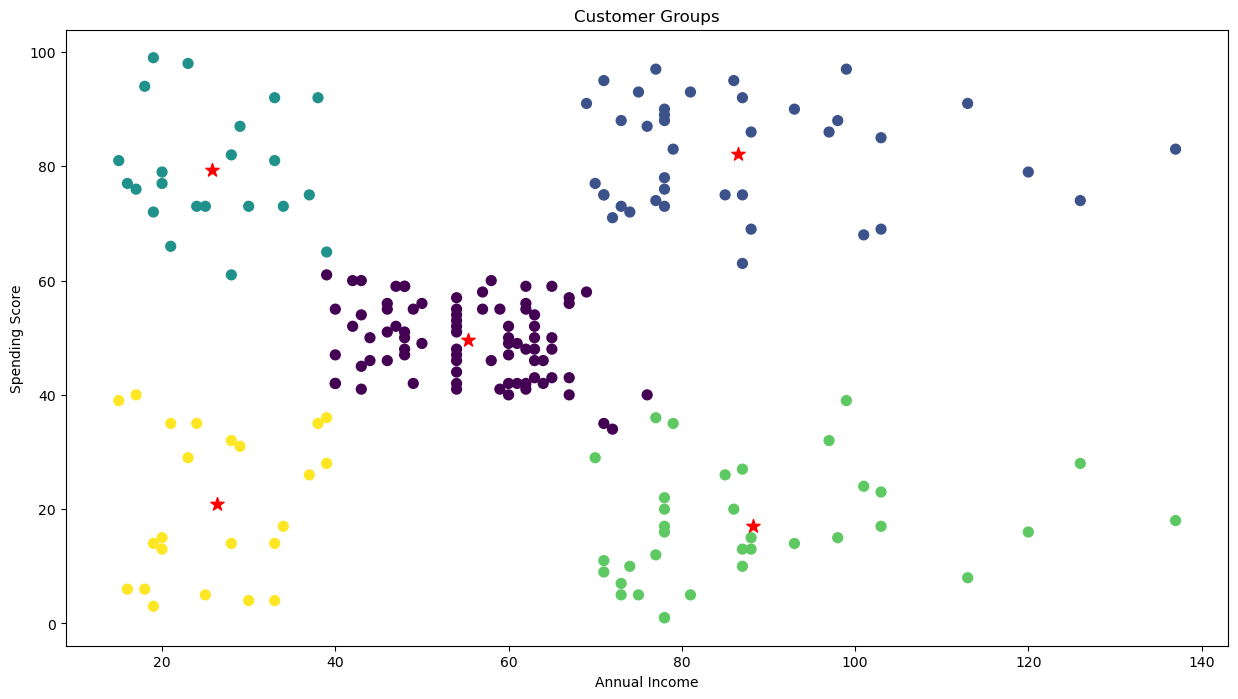

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],s=50, c=km.labels_)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100, c='red', marker='*')


plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow


5

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[0.38908480253667166,
 0.46761358158775435,
 0.4937945814354117,
 0.553931997444648,
 0.53976103063432,
 0.5020670377583197,
 0.45481197931195283,
 0.45678676900594906,
 0.43023216902791445]

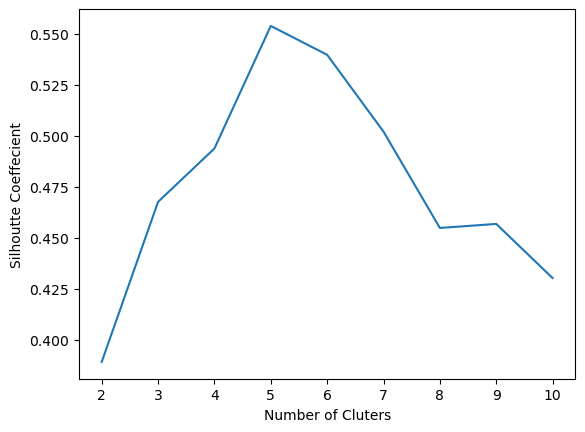

In [ ]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, km.labels_)

0.553931997444648

# Hierarchical Clustering

In [ ]:
X = customer_data[['Annual Income (k$)',	'Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

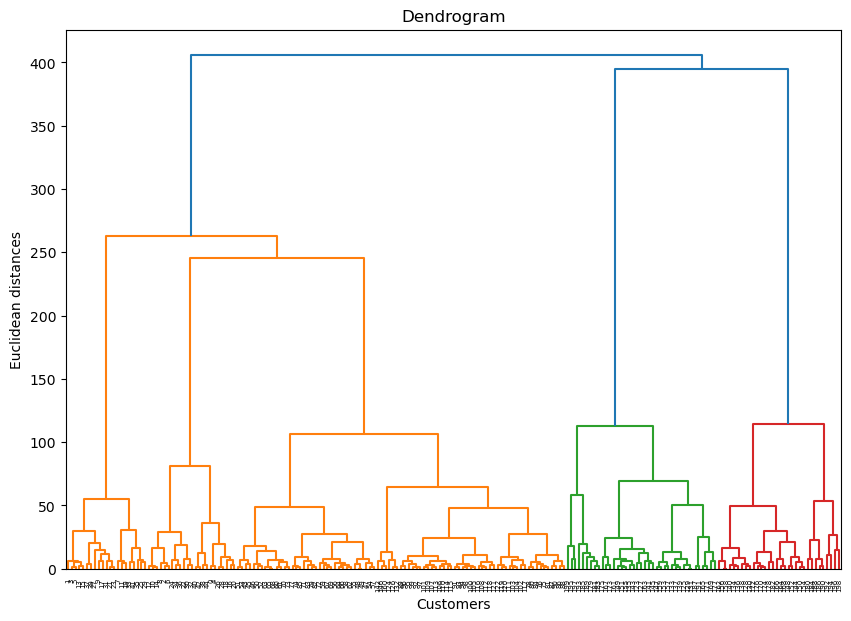

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))

dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc.fit(X)

AgglomerativeClustering(n_clusters=5)

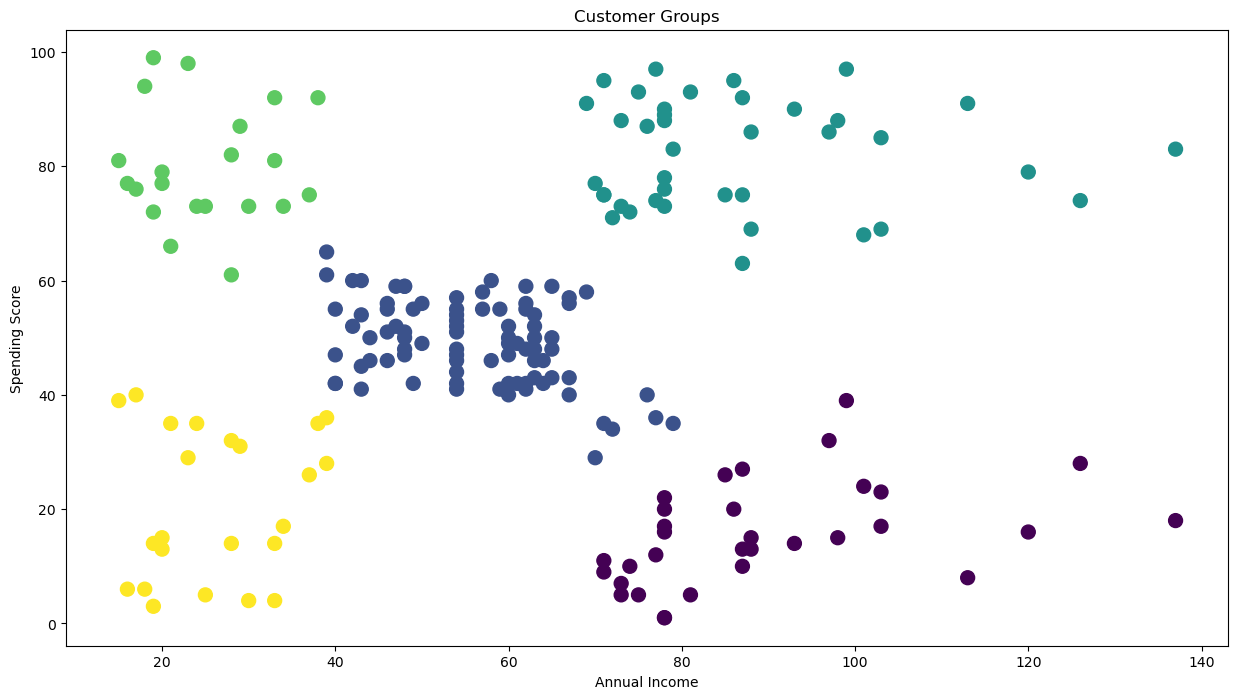

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],s=100, c=hc.labels_)

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
X = customer_data[['Age', 'Spending Score (1-100)']]


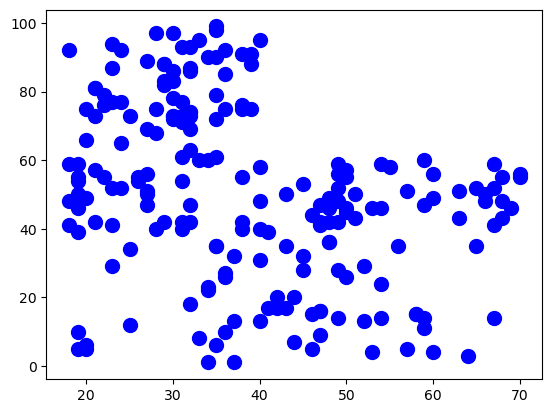

In [ ]:
plt.scatter(X[["Age"]], X[["Spending Score (1-100)"]], s=100, c='blue')

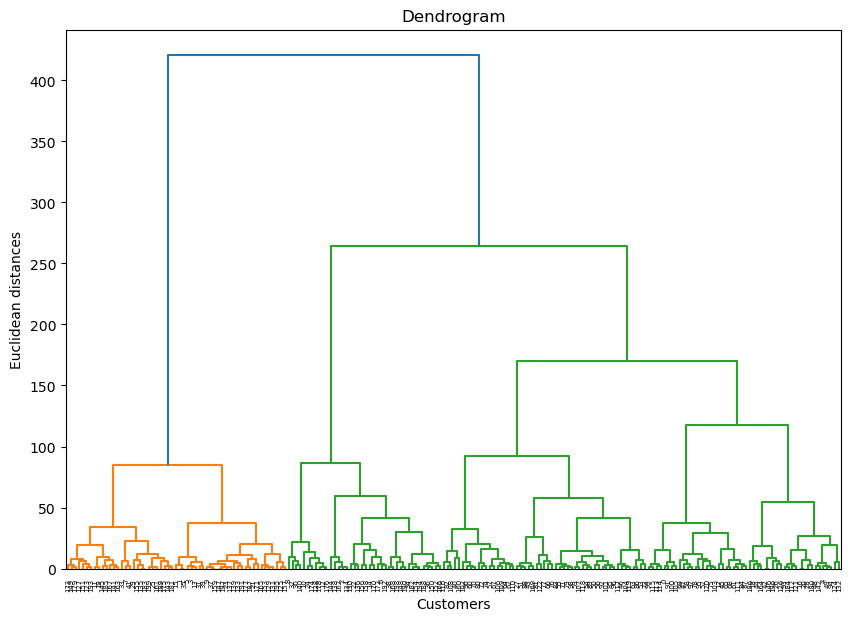

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=3,  linkage='ward')
hc.fit(X)

AgglomerativeClustering(n_clusters=3)

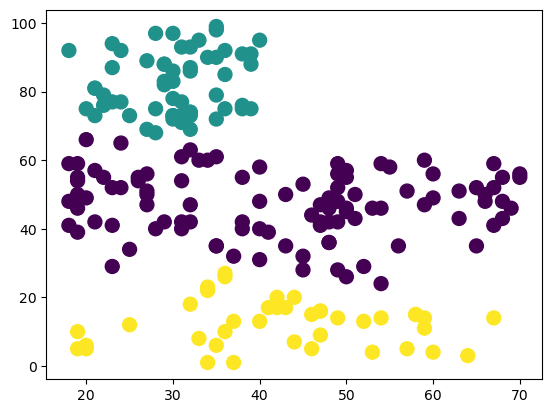

In [ ]:
plt.scatter(X[["Age"]], X[["Spending Score (1-100)"]], s=100, c=hc.labels_)

# DBSCAN

In [ ]:
X = customer_data[['Age', 'Spending Score (1-100)']]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(eps=0.33, min_samples=5)
dbscan.fit(data_scaled)



DBSCAN(eps=0.33)

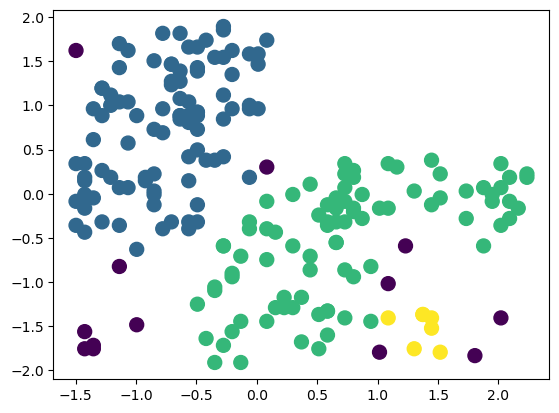

In [ ]:
plt.scatter(data_scaled[:,0], data_scaled[:,1], s=100, c=dbscan.labels_)

In [ ]:
dbscan.labels_

array([ 0,  0, -1,  0,  0,  0,  1,  0, -1,  0, -1,  0,  2,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  2,  0,  1,  0,  1,  0,  2,  0, -1, -1,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,
        0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,
        1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,
        1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1, -1,  0, -1,  0,  1,  0,  2,  0,  1,  0,  0,  0, -1,  0,
        1,  0, -1,  0,  2,  0,  0,  0, -1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  2,  0,  2,  0,  1,  0,  1,  0,  1,  0, -1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0], dtype=int64)

In [ ]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=250,noise=0.05)

In [ ]:
X

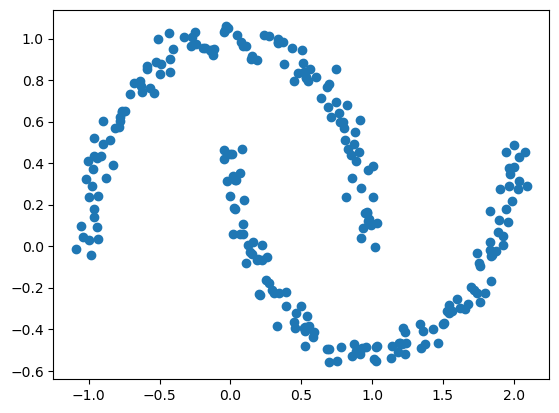

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled

In [ ]:
dbcan=DBSCAN(eps=0.3)
dbcan.fit(X_scaled)

DBSCAN(eps=0.3)

In [ ]:
dbcan.labels_

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

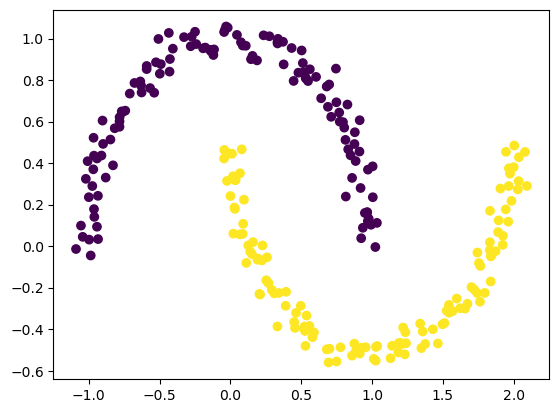

In [ ]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)